# Observations timeseries demo

In this notebook we use the backend API to retrieve a time series with observations data and then plot it.

In [13]:
%matplotlib widget

import httpx
import matplotlib.pyplot as plt
import pandas as pd

station_code = "91"
variable_name = "TDd"
month = 1
date_range = "../.."
mann_kendall_start = 2003
mann_kendal_end = 2008

api_url = f"http://webapp:5001/api/v2/observations/time-series/{station_code}/{variable_name}/{month}"


def _parse_to_dataframe(time_series: dict):
    df = pd.DataFrame.from_records(time_series["values"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    return df    

In [18]:
raw_response = httpx.get(
    api_url,
    params={
        "datetime": date_range,
        "include_decade_data": True,
        "smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_5_YEARS",
        ],
        "include_mann_kendall_trend": True,
        "mann_kendall_start_year": mann_kendall_start,
        "mann_kendall_end_year": mann_kendal_end,
    }
)
raw_response.raise_for_status()

raw_series = raw_response.json()["series"]

series = {s["name"]: s for s in raw_series}
dfs = {v["name"]: _parse_to_dataframe(v) for v in series.values()}

### Plotting

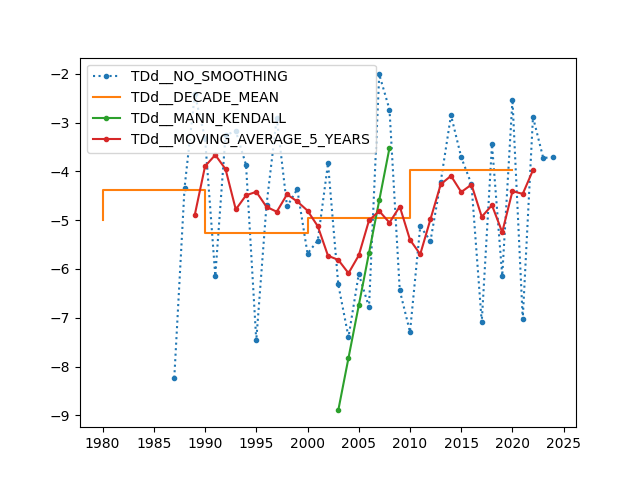

In [19]:
fig, ax = plt.subplots()

raw_measurements_line, = ax.plot(dfs[f"{variable_name}__NO_SMOOTHING"], label=f"{variable_name}__NO_SMOOTHING")
raw_measurements_line.set_linestyle(":")
raw_measurements_line.set_marker(".")

alread_plotted = (
    f"{variable_name}__NO_SMOOTHING",
)
for name, df in dfs.items():
    if "decade" in name.lower():
        ax.step(df.index, df[df.columns[0]], label=name)
    elif name not in alread_plotted:
        ax.plot(df, label=name, marker=".")


ax.legend()

In [16]:
ax.clear()

In [21]:
series["TDd__MANN_KENDALL"]["info"]

{'trend': 'no trend',
 'h': 0.0,
 'p': 0.2596563563704499,
 'z': 1.1272037239532693,
 'tau': 0.4666666666666667,
 's': 7.0,
 'var_s': 28.333333333333332,
 'slope': 1.076,
 'intercept': -8.8985}